In [1]:

from Magics import macro as magics

MAGPLUS_QUIET is ON


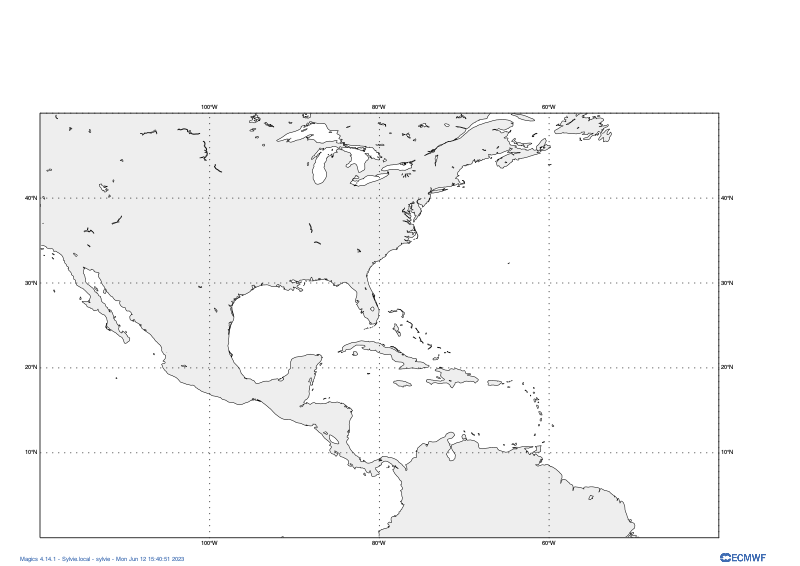

In [2]:
area = magics.mmap(
    subpage_lower_left_latitude = 0,
    subpage_lower_left_longitude = -120,
    subpage_upper_right_latitude = 50,
    subpage_upper_right_longitude = -40,
)

coastlines = magics.mcoast(
    map_coastline_land_shade= True,
    map_coastline_land_shade_colour = '#efefef',
    map_grid_line_style = "dot"
    )

magics.plot(area, coastlines)

In [7]:
import ipywidgets as widgets


steps = []
pos = 1
for i in range(6,150, 6):
    steps.append((f"T+{i}h", pos))
    pos = pos+1
    
    
layers = {
        "accumulated preciptation over 6h": "tp6",
        "Wind gust at 10m" : "10fg6",
        "Mean sea level pressure": "mslp",
        "Sea surface temperature": "sst"
}

print (layers.items())

@widgets.interact(
    date = widgets.Dropdown(
                    options=[20220925, 20220926, 20220927, 20220928],
                    description='Forecast base time'),
    step = widgets.Dropdown(
           options=steps,
           description='Step'),
    layer = widgets.Dropdown(
           options=layers.items(),
           description='parameter')
    
)
def plot(date, step, layer):
    
    print ( "Plotting", f"data/tp6-{date}.grib", "at step",  step)
    
    data = magics.mgrib(grib_input_file_name = f"data/{layer}-{date}.grib", 
                          grib_field_position = step)
    
    contour = magics.mcont(contour_automatic_setting = "ecmwf", legend= True)
    
    title = magics.mtext()
    legend = magics.mlegend()
    return magics.plot(area, coastlines, data, contour, magics.mcoast() legend, title)
    

dict_items([('accumulated preciptation over 6h', 'tp6'), ('Wind gust at 10m', '10fg6'), ('Mean sea level pressure', 'mslp'), ('Sea surface temperature', 'sst')])


interactive(children=(Dropdown(description='Forecast base time', options=(20220925, 20220926, 20220927, 202209…